In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
data = pd.read_csv("Unemployment in India.csv")

In [3]:
# Removing duplicate rows
data = data.drop_duplicates()

# Removing rows having null values
data = data.dropna()

# Cleaning column names 
data.columns = data.columns.str.strip()

# Convert Date column 
data['Date'] = pd.to_datetime(data['Date'])

pd.set_option('display.max_rows', None)
print(data)


               Region       Date Frequency  Estimated Unemployment Rate (%)  \
0      Andhra Pradesh 2019-05-31   Monthly                             3.65   
1      Andhra Pradesh 2019-06-30   Monthly                             3.05   
2      Andhra Pradesh 2019-07-31   Monthly                             3.75   
3      Andhra Pradesh 2019-08-31   Monthly                             3.32   
4      Andhra Pradesh 2019-09-30   Monthly                             5.17   
5      Andhra Pradesh 2019-10-31   Monthly                             3.52   
6      Andhra Pradesh 2019-11-30   Monthly                             4.12   
7      Andhra Pradesh 2019-12-31   Monthly                             4.38   
8      Andhra Pradesh 2020-01-31   Monthly                             4.84   
9      Andhra Pradesh 2020-02-29   Monthly                             5.91   
10     Andhra Pradesh 2020-03-31   Monthly                             4.06   
11     Andhra Pradesh 2020-04-30   Monthly          

In [4]:
# Step 4: Rename columns to make them easy
data.columns = [
    "Region",
    "Date",
    "Frequency",
    "Unemployment_Rate",
    "Employed",
    "Labour_Participation_Rate",
    "Area"
]

In [5]:
# Step 5: Convert Date column into date format
data["Date"] = pd.to_datetime(data["Date"])


In [6]:
# Step 6: Check missing values
print(data.isnull().sum())


Region                       0
Date                         0
Frequency                    0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Area                         0
dtype: int64


In [7]:
# Step 7: Remove missing values
data = data.dropna()


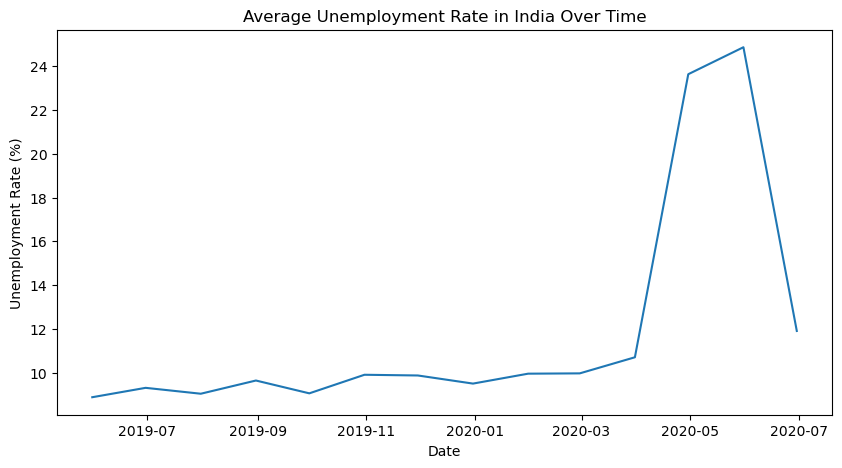

In [8]:
# Calculate average unemployment per date
avg_data = data.groupby("Date")["Unemployment_Rate"].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_data.index, avg_data.values)
plt.title("Average Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


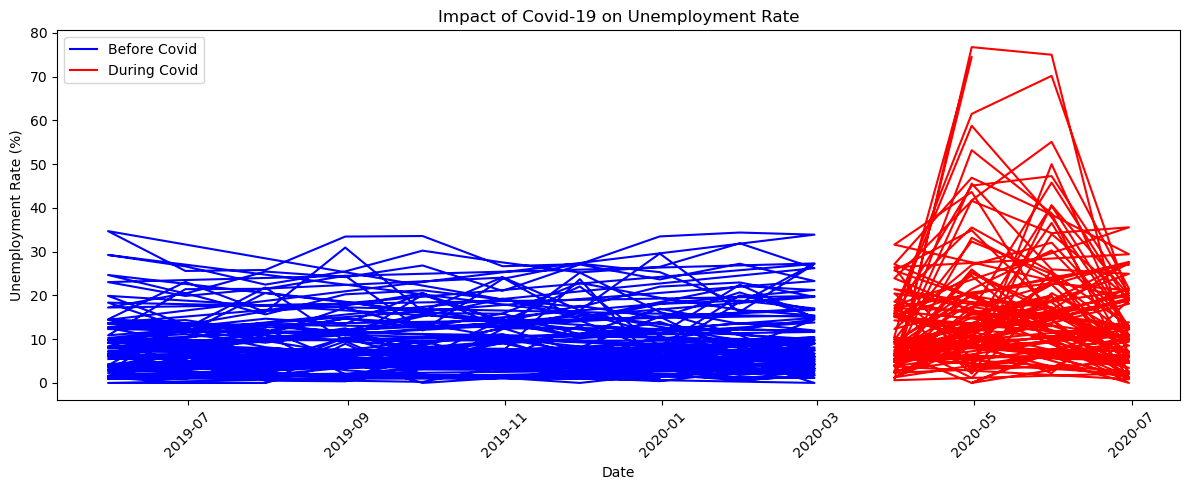

In [9]:
# Impact of Covid-19
# Covid period starts from March 2020
covid_start = "2020-03-01"

before_covid = data[data["Date"] < covid_start]   # data before Covid
during_covid = data[data["Date"] >= covid_start]  # data during Covid

plt.figure(figsize=(12,5)) 

plt.plot(before_covid["Date"], before_covid["Unemployment_Rate"], label="Before Covid", color='blue')
plt.plot(during_covid["Date"], during_covid["Unemployment_Rate"], label="During Covid", color='red')

plt.title("Impact of Covid-19 on Unemployment Rate")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.xticks(rotation=45)  # rotate dates for better readability
plt.tight_layout()        # makes layout neat
plt.show()


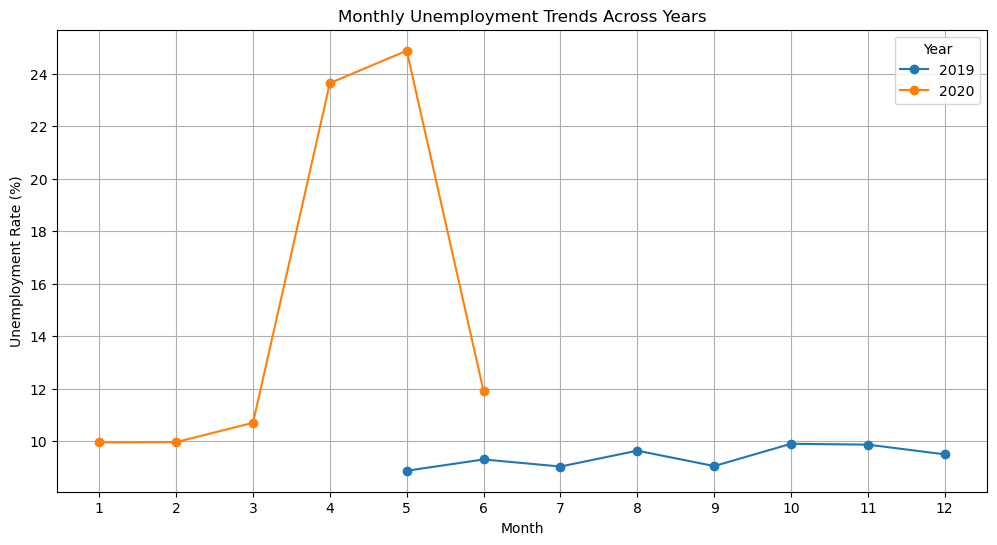

In [10]:
# Seasonal / Yearly trends
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month

# Calculate average unemployment rate for each month of each year
monthly_trends = data.groupby(["Month", "Year"])["Unemployment_Rate"].mean().unstack()

#Plot monthly unemployment trends for each year
plt.figure(figsize=(12,6))

# Loop through each year and plot its monthly data
for year in monthly_trends.columns:
    plt.plot(monthly_trends.index, monthly_trends[year], marker='o', label=str(year))

plt.title("Monthly Unemployment Trends Across Years")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(range(1, 13))  # Show all months on x-axis
plt.legend(title="Year")
plt.grid(True)
plt.show()


In [11]:
# Insights
print("Key Insights:")
print("1. Unemployment rates increased sharply during the Covid-19 period compared to before Covid.")
print("2. The highest spikes in unemployment occurred around April and May 2020, likely due to lockdowns.")
print("3. Before Covid, unemployment rates were relatively stable with some seasonal fluctuations.")
print("4. The wide range of unemployment rates during Covid suggests uneven impact across different groups or regions.")
print("5. Understanding these trends can support better-targeted economic and social policies to aid recovery.")


Key Insights:
1. Unemployment rates increased sharply during the Covid-19 period compared to before Covid.
2. The highest spikes in unemployment occurred around April and May 2020, likely due to lockdowns.
3. Before Covid, unemployment rates were relatively stable with some seasonal fluctuations.
4. The wide range of unemployment rates during Covid suggests uneven impact across different groups or regions.
5. Understanding these trends can support better-targeted economic and social policies to aid recovery.
